In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

In [ ]:
!pip install pydot

import pydot
from IPython.core.display import Image 

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/DSL/정규세션/220208 Decision Tree/[정규세션 220208] Decision Tree/diabetes.csv")

In [ ]:
data.head()

In [ ]:
data.describe()

In [ ]:
data.info()

In [ ]:
data_array = data.values
print(data_array)

[[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]


In [ ]:
data_X  = data_array[:,:8]

In [ ]:
data_features_names = list(data.columns[0:-1])
print(data_features_names)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [ ]:
data_target_names= ['diabetes_X','diabetes_O']

In [ ]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
X, y = data_X, data_array[:,8]

In [ ]:
 # classification tree 구축 및 적합
clf = DecisionTreeClassifier()
clf = clf.fit(X, y)

In [ ]:
dot_data = export_graphviz(clf, out_file = None, # out_file: 파일로 내보내고자 하는 것이 아니라 직접 그리기 때문에 None
                                feature_names = data_features_names,
                                class_names = data_target_names,
                                filled = True, # 색 넣어줌
                                rounded = True, # 반올림
                                special_characters = True) # 특수문자를 대비해서 넣어주는 옵션

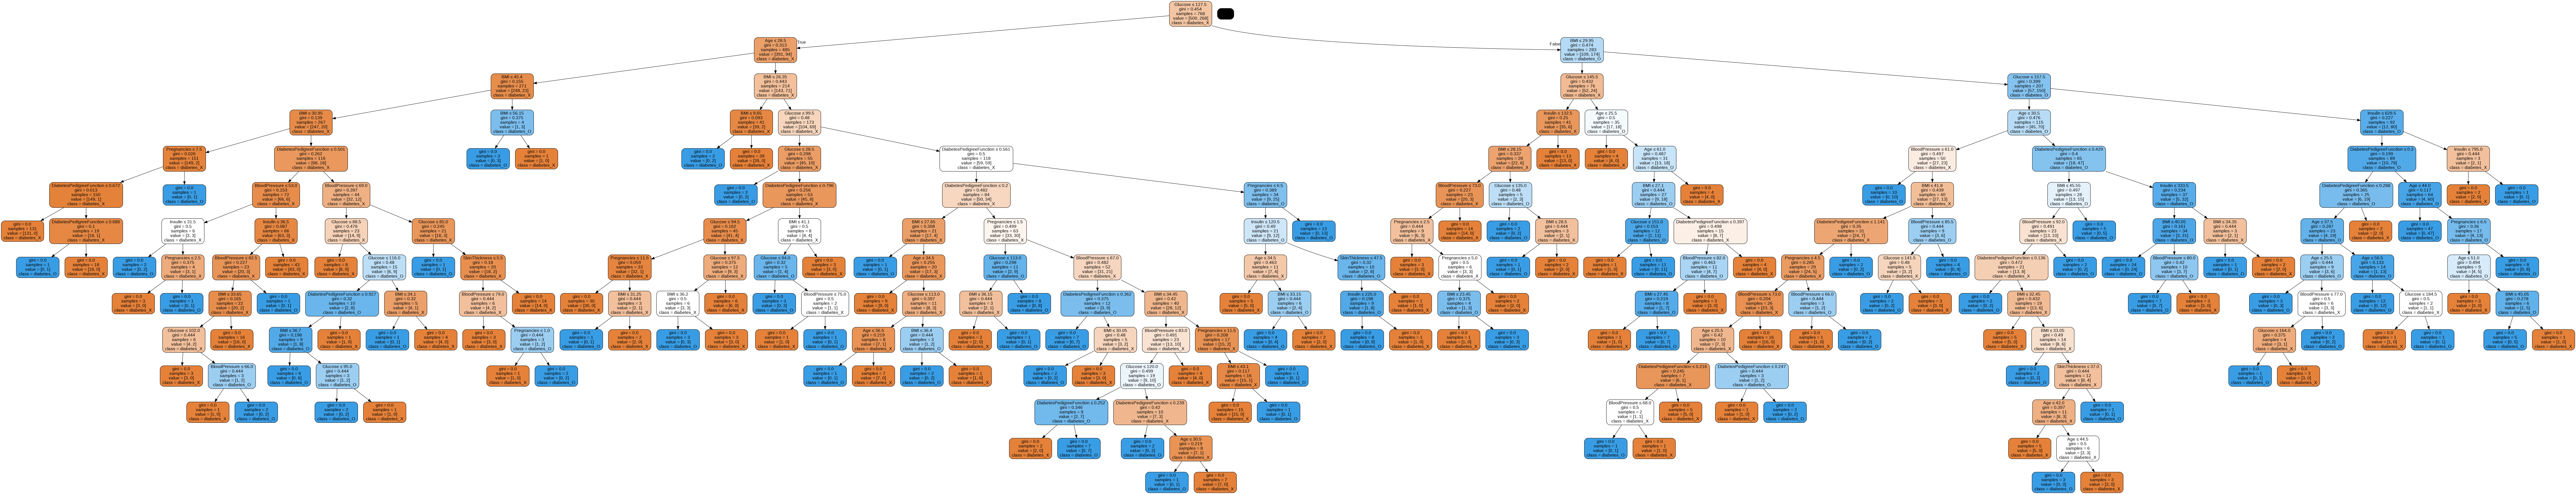

In [ ]:
graph = pydot.graph_from_dot_data(dot_data)[0]
image = graph.create_png()
Image(image)

# 너무자세하게 분류가 되고 있기 때문에 가지치기를 진행하여야 한다. 

In [ ]:

#결정나무를 만들고 시각화하는 것을 함수로 내는 코드이다 

def draw_decision_tree(clf, feature_names = None, class_names = None):
    dot_data = export_graphviz(clf, out_file = None, 
                                feature_names = feature_names,
                                class_names = class_names,
                                filled = True, 
                                rounded = True,
                                special_characters = True)
    graph = pydot.graph_from_dot_data(dot_data)[0]
    image = graph.create_png()
    return Image(image)

In [ ]:
clf = DecisionTreeClassifier()
not_tuned_tree = clf.fit(X, y)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) 

In [ ]:
from sklearn.model_selection import cross_validate
import numpy as np
scoring = ['f1','precision','recall']
tree_scores = cross_validate(not_tuned_tree, X_train, y_train, scoring=scoring, cv=5, return_train_score = False)

print("parameter가 tuning 되지 않았을 때의 F1 Score : {:.3f}".format(np.mean(tree_scores['test_f1'])))

parameter가 tuning 되지 않았을 때의 F1 Score : 0.543


In [ ]:
from sklearn.model_selection import GridSearchCV 

In [ ]:

# max_depth 와 min_samples_split라는 parameter에 대해 범위 지정
hyperparamters = {'max_depth': list(range(2, 8)),  'min_samples_split': list(range(2, 20))}

# GridSearch 진행
GridCV = GridSearchCV(estimator=not_tuned_tree, param_grid=hyperparamters, cv=5, verbose=1)

GridCV.fit(X_train, y_train)
GridCV.best_params_ # 가장 좋은 성능을 보였을 때의 parameter

Fitting 5 folds for each of 108 candidates, totalling 540 fits


{'max_depth': 4, 'min_samples_split': 5}

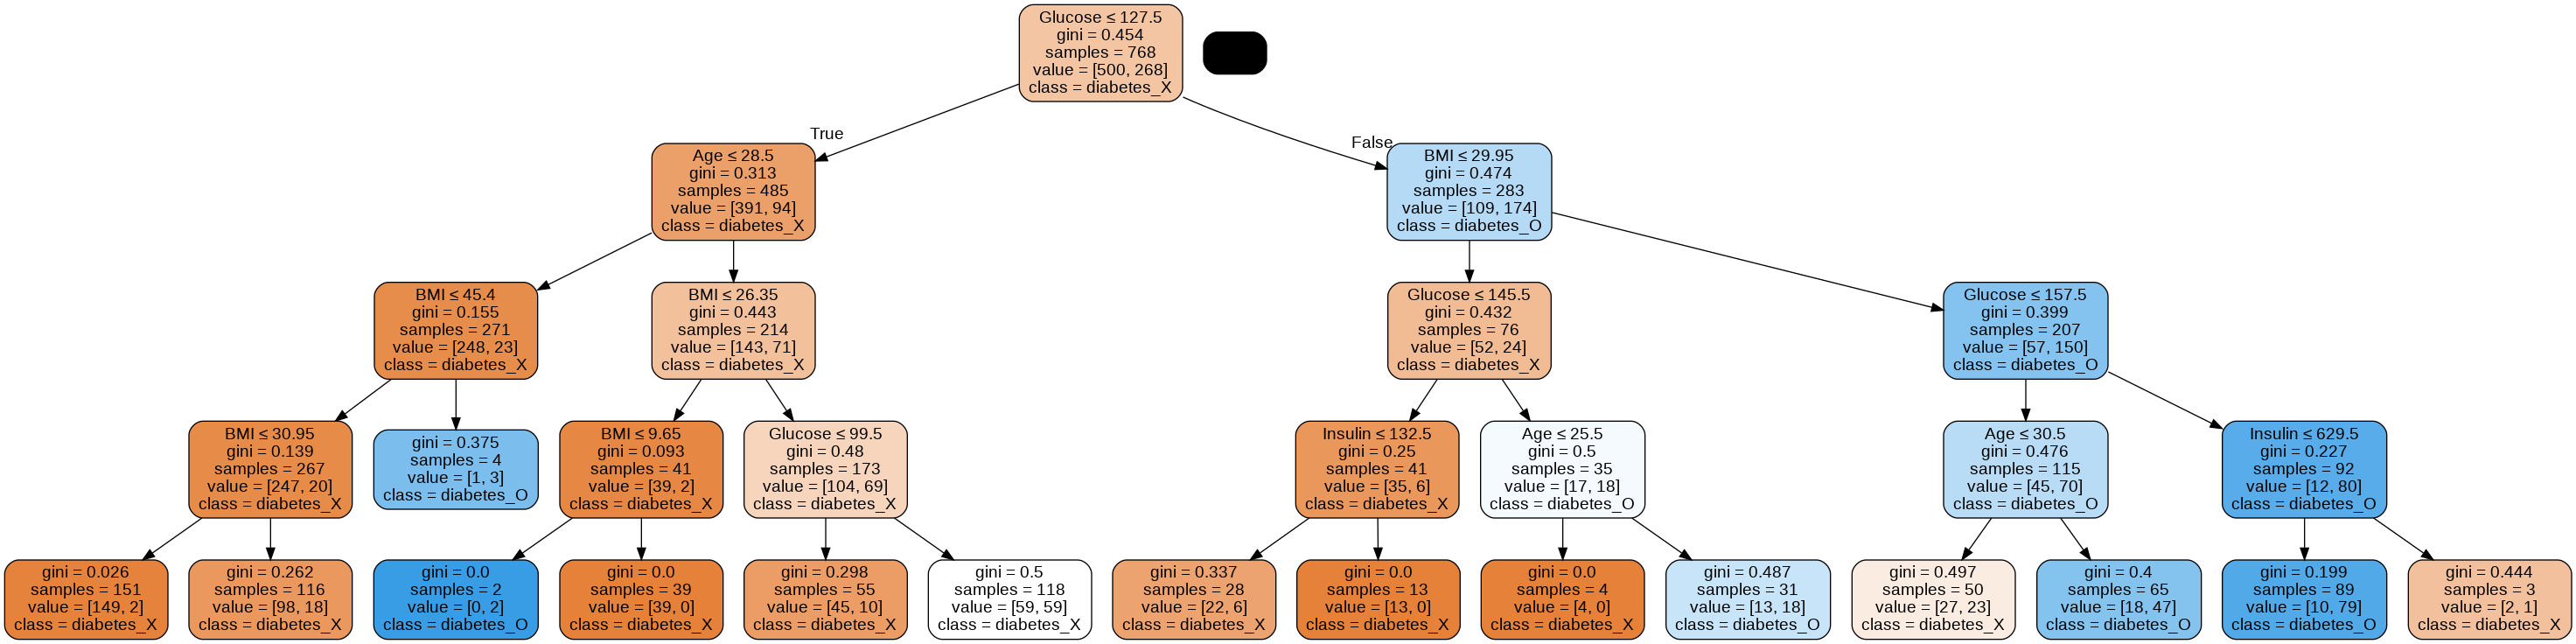

In [ ]:
#Grid Search 에서 구한 최적의 파라미터를 토대로 다시 생성하였고, 나무를 그렸다.
clf_2 = DecisionTreeClassifier(max_depth = 4,min_samples_split = 5)
tuned_tree = clf_2.fit(X, y)
draw_decision_tree(tuned_tree, data_features_names, data_target_names)

In [ ]:
from sklearn.model_selection import cross_validate
import numpy as np
scoring = ['f1','precision','recall']
tuned_tree_scores = cross_validate(tuned_tree, X_train, y_train, scoring=scoring, cv=5, return_train_score = False)

print("parameter가 tuning 되었을때의 때의 F1 Score : {:.3f}".format(np.mean(tuned_tree_scores['test_f1'])))
# 파라미터가 튜닝됐을때 f1스코어가 많이 올라갔다. 

parameter가 tuning 되었을때의 때의 F1 Score : 0.608


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
clf = DecisionTreeClassifier(max_depth = 4,min_samples_split = 5)
tuned_tree = clf.fit(X,y)

In [ ]:
y_predict=tuned_tree.predict(X_test)

In [ ]:
accuracy_score(y_test, y_predict)

0.796875